In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [68]:
#Read data
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
# understanding data

train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [10]:
train.shape

(54808, 14)

54808 rows and 14 columns including tartget

In [22]:
#Check for missing values
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [21]:
test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


Missing values to be handled

Univariate Analysis

In [12]:
# Target Variable - is_promoted

train["is_promoted"].value_counts()

,count
is_promoted,
0,50140
1,4668


<Axes: title={'center': 'is_promoted'}, xlabel='is_promoted'>

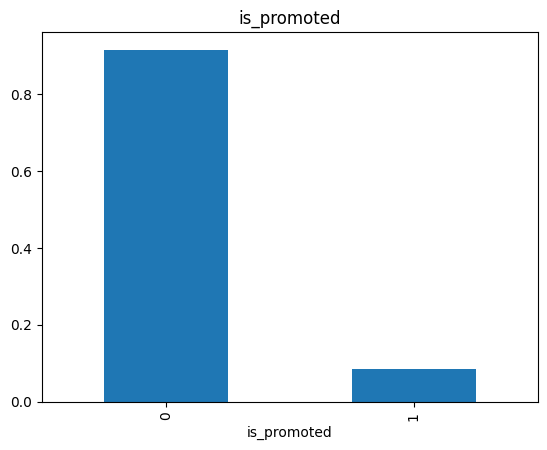

In [15]:
# Univariate analysis of categorical columns

train["is_promoted"].value_counts(normalize=True).plot.bar(title = 'is_promoted')

Target column looks imbalanced, to be handled

<Axes: title={'center': 'department'}, xlabel='department'>

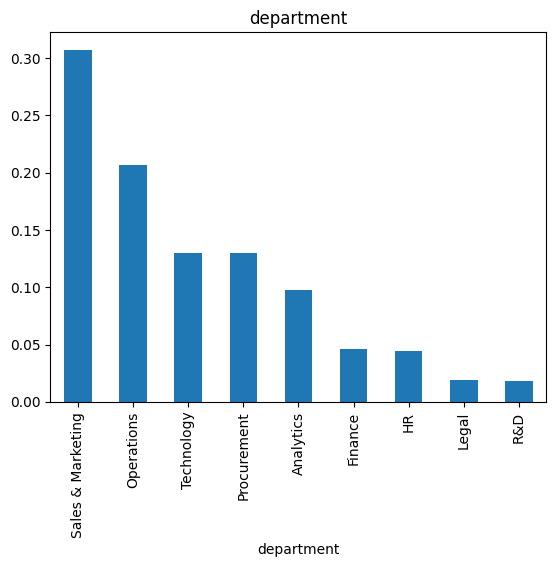

In [16]:
train['department'].value_counts(normalize=True).plot.bar(title= 'department')

<Axes: title={'center': 'region'}, xlabel='region'>

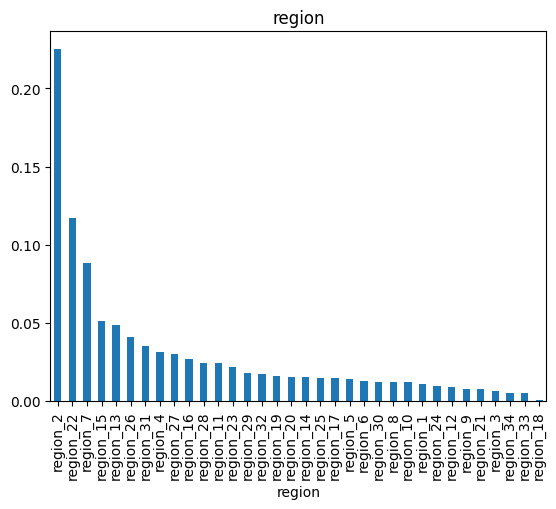

In [17]:
train['region'].value_counts(normalize=True).plot.bar(title= 'region')

<Axes: title={'center': 'education'}, xlabel='education'>

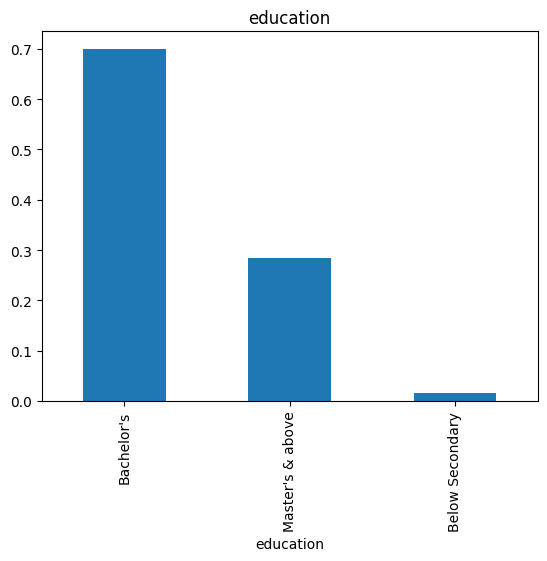

In [18]:
train['education'].value_counts(normalize=True).plot.bar(title= 'education')

In [ ]:
train['education'].value_counts(normalize=True).plot.bar(title= 'education')

<Axes: title={'center': 'gender'}, xlabel='gender'>

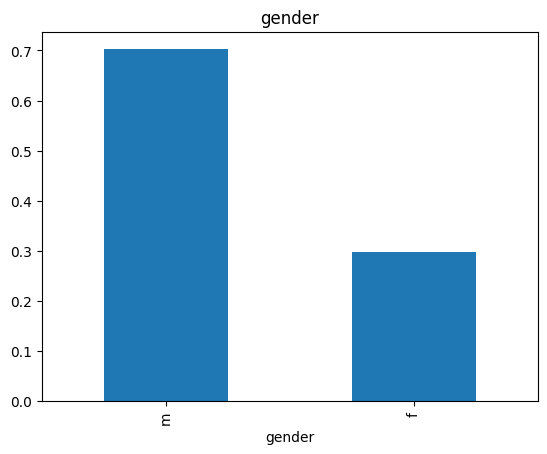

In [19]:
train['gender'].value_counts(normalize=True).plot.bar(title= 'gender')


<Axes: title={'center': 'recruitment_channel'}, xlabel='recruitment_channel'>

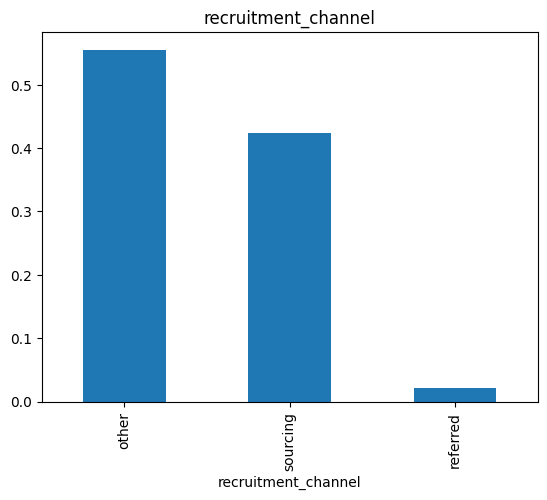

In [23]:

train['recruitment_channel'].value_counts(normalize=True).plot.bar(title= 'recruitment_channel')


In [24]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


<Axes: title={'center': 'no_of_trainings'}, xlabel='no_of_trainings'>

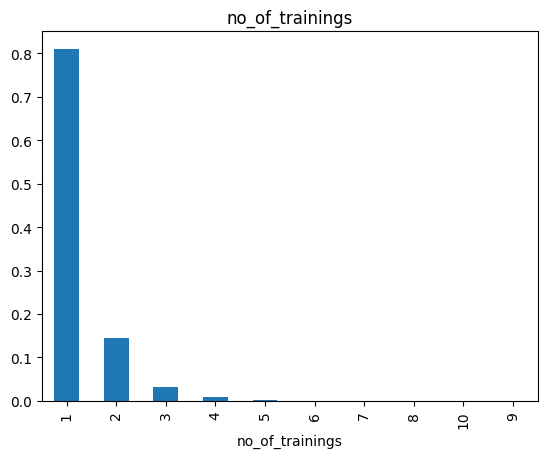

In [25]:
train['no_of_trainings'].value_counts(normalize=True).plot.bar(title= 'no_of_trainings')


<Axes: title={'center': 'KPIs_met >80%'}, xlabel='KPIs_met >80%'>

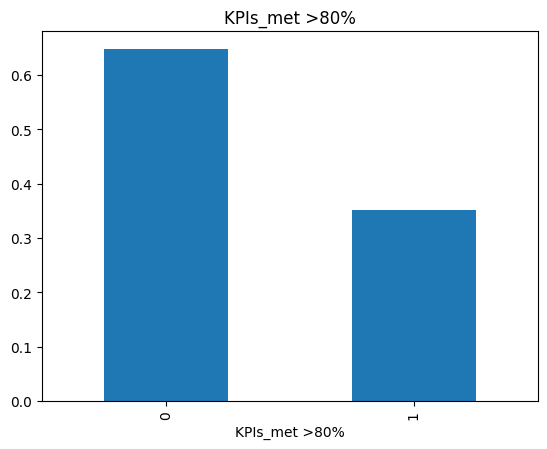

In [26]:
train['KPIs_met >80%'].value_counts(normalize=True).plot.bar(title= 'KPIs_met >80%')


<Axes: title={'center': 'awards_won?'}, xlabel='awards_won?'>

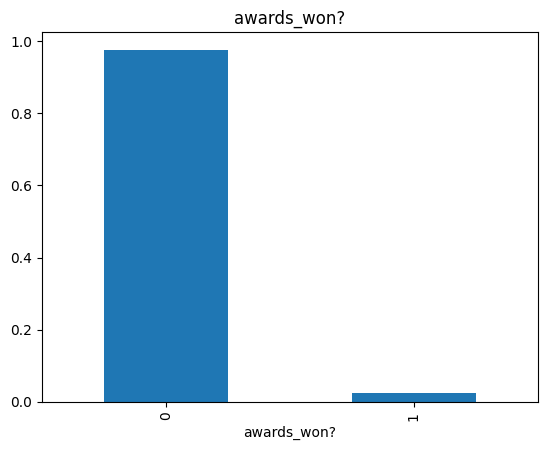

In [27]:
train['awards_won?'].value_counts(normalize=True).plot.bar(title= 'awards_won?')

<Axes: title={'center': 'previous_year_rating'}, xlabel='previous_year_rating'>

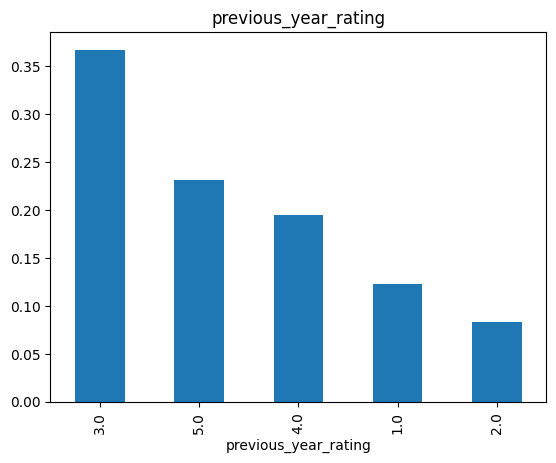

In [28]:
train['previous_year_rating'].value_counts(normalize=True).plot.bar(title= 'previous_year_rating')

In [ ]:
# Most of the employees are in sales & Marketing, least in Legal and R&D
# Most of the employees are from region 2 and least in region 18
# Most employees have bachlors degree
# Employees attended atleast 1 training is the most
# Most employees didnt won any awards

In [29]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


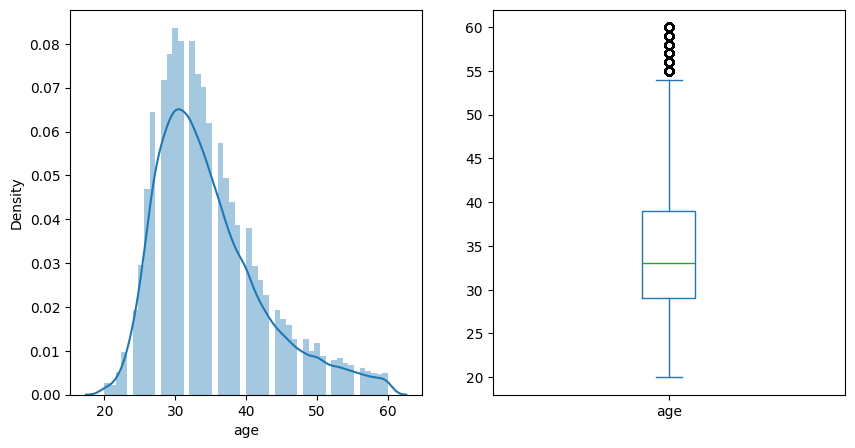

In [31]:
# Distribution of continous variable

plt.figure(1)
plt.subplot(121)
sns.distplot(train["age"]);

plt.subplot(122)
train["age"].plot.box(figsize=(10,5))
plt.show()

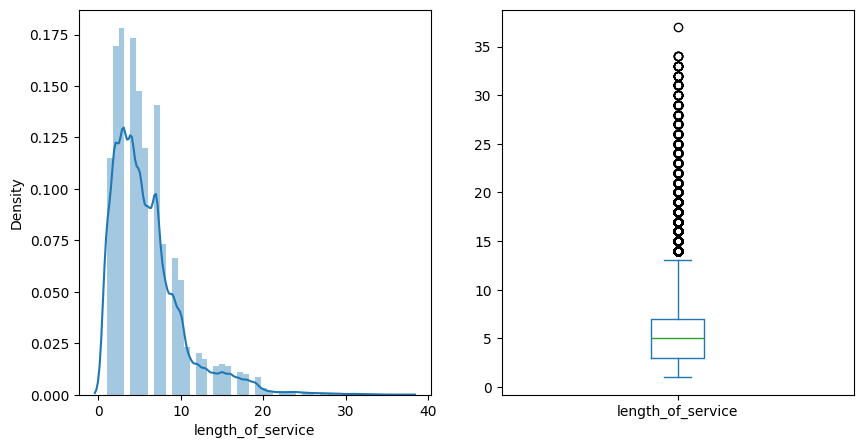

In [32]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["length_of_service"]);

plt.subplot(122)
train["length_of_service"].plot.box(figsize=(10,5))
plt.show()

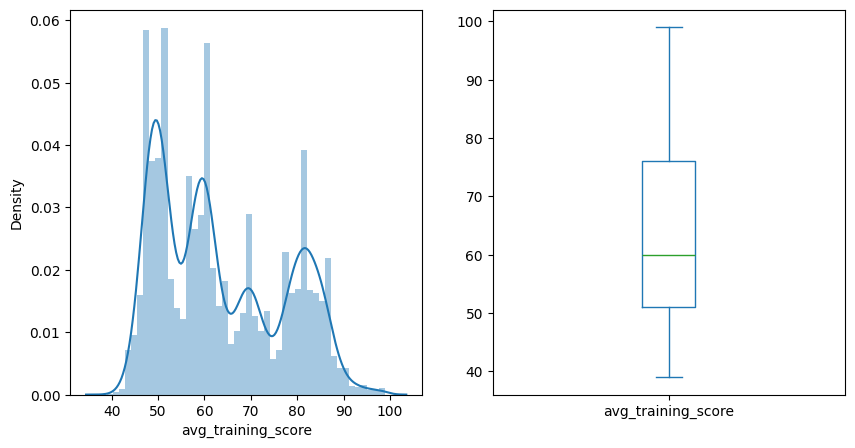

In [33]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["avg_training_score"]);

plt.subplot(122)
train["avg_training_score"].plot.box(figsize=(10,5))
plt.show()

Outliers to be handled

Bivariate Analysis

In [34]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [37]:
# Categorical Independent Variable vs Target Variable

print(pd.crosstab(train["department"],train["is_promoted"]))

is_promoted            0     1
department                    
Analytics           4840   512
Finance             2330   206
HR                  2282   136
Legal                986    53
Operations         10325  1023
Procurement         6450   688
R&D                  930    69
Sales & Marketing  15627  1213
Technology          6370   768


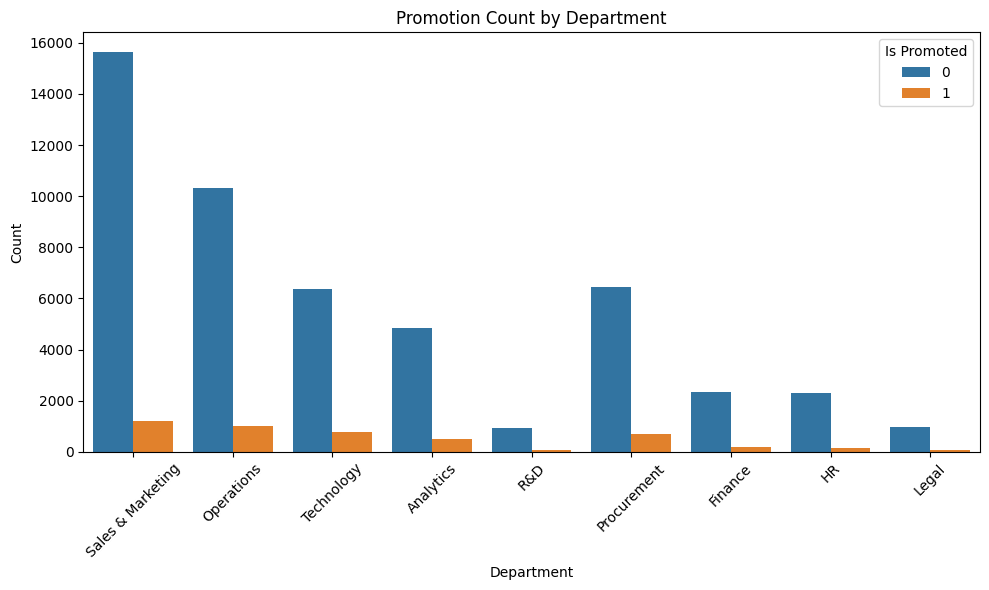

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='department', hue='is_promoted')
plt.title('Promotion Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

In [38]:
print(pd.crosstab(train["region"],train["is_promoted"]))

is_promoted      0    1
region                 
region_1       552   58
region_10      597   51
region_11     1241   74
region_12      467   33
region_13     2418  230
region_14      765   62
region_15     2586  222
region_16     1363  102
region_17      687  109
region_18       30    1
region_19      821   53
region_2     11354  989
region_20      801   49
region_21      393   18
region_22     5694  734
region_23     1038  137
region_24      490   18
region_25      716  103
region_26     2117  143
region_27     1528  131
region_28     1164  154
region_29      951   43
region_3       309   37
region_30      598   59
region_31     1825  110
region_32      905   40
region_33      259   10
region_34      284    8
region_4      1457  246
region_5       731   35
region_6       658   32
region_7      4327  516
region_8       602   53
region_9       412    8


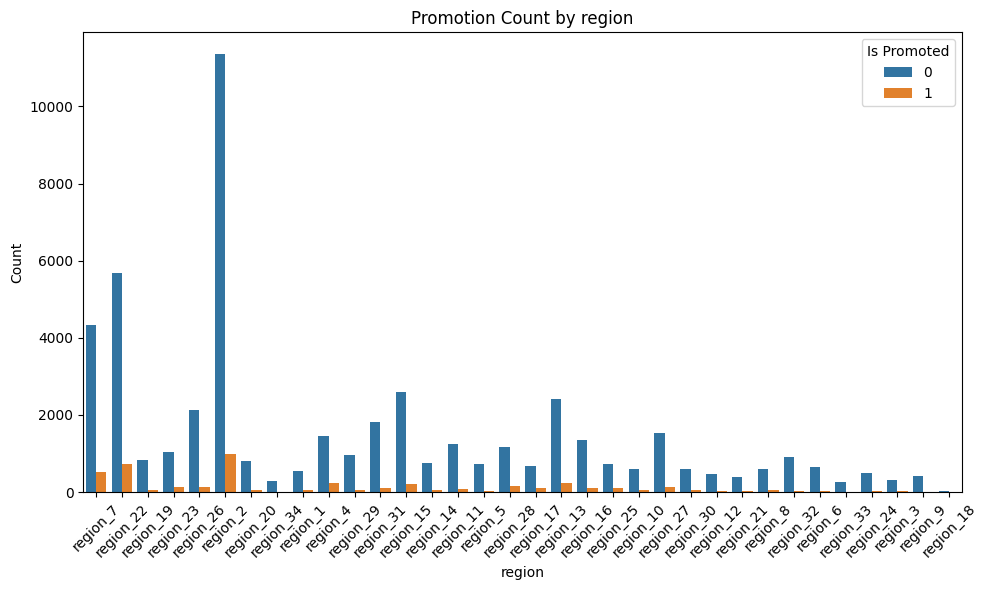

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='region', hue='is_promoted')
plt.title('Promotion Count by region')
plt.xlabel('region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

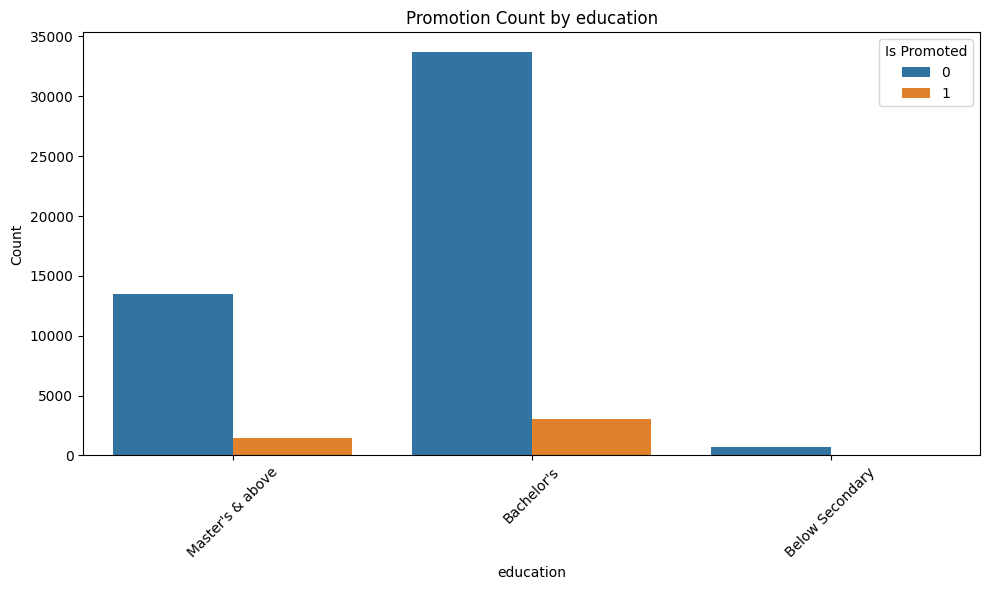

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='education', hue='is_promoted')
plt.title('Promotion Count by education')
plt.xlabel('education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

In [52]:
print(pd.crosstab(train["gender"],train["is_promoted"]))

is_promoted      0     1
gender                  
f            14845  1467
m            35295  3201


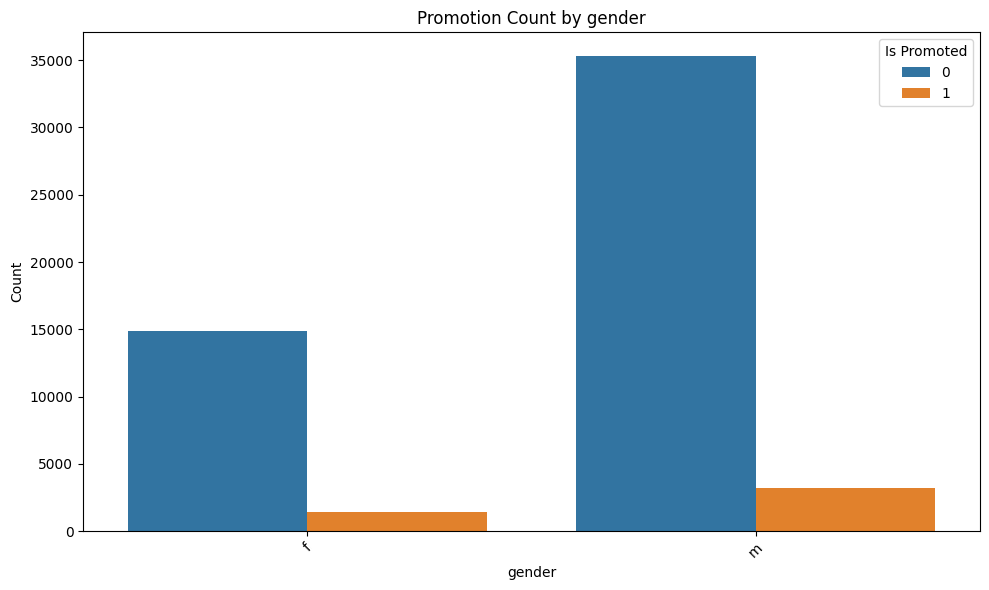

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='gender', hue='is_promoted')
plt.title('Promotion Count by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

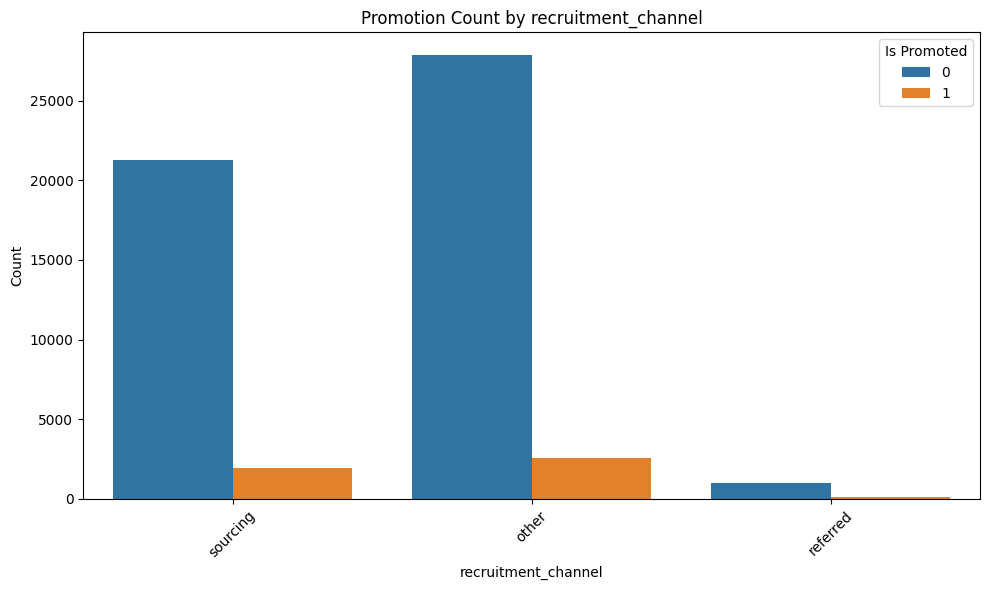

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='recruitment_channel', hue='is_promoted')
plt.title('Promotion Count by recruitment_channel')
plt.xlabel('recruitment_channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

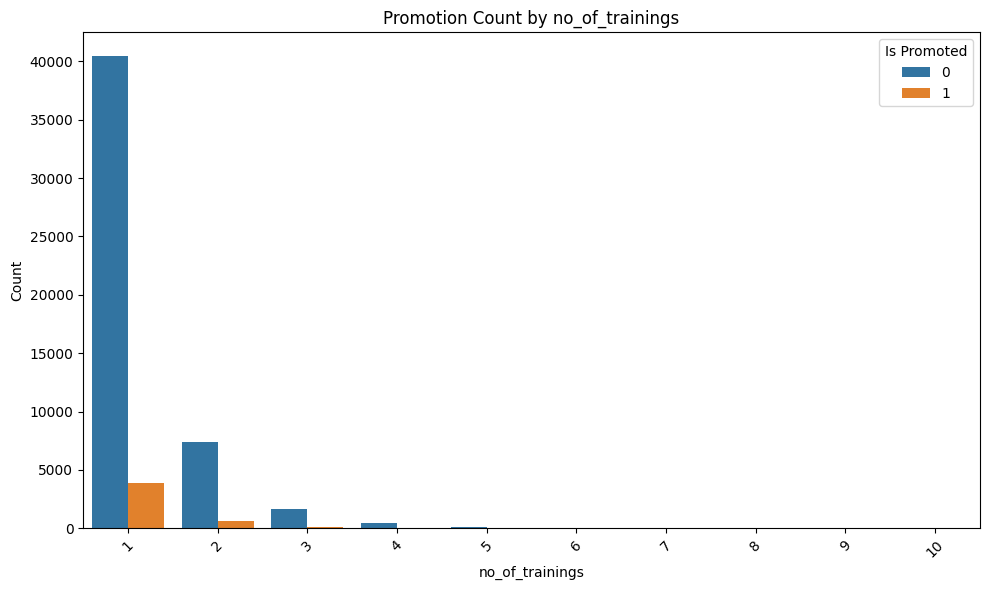

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='no_of_trainings', hue='is_promoted')
plt.title('Promotion Count by no_of_trainings')
plt.xlabel('no_of_trainings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

Training could be a preditor

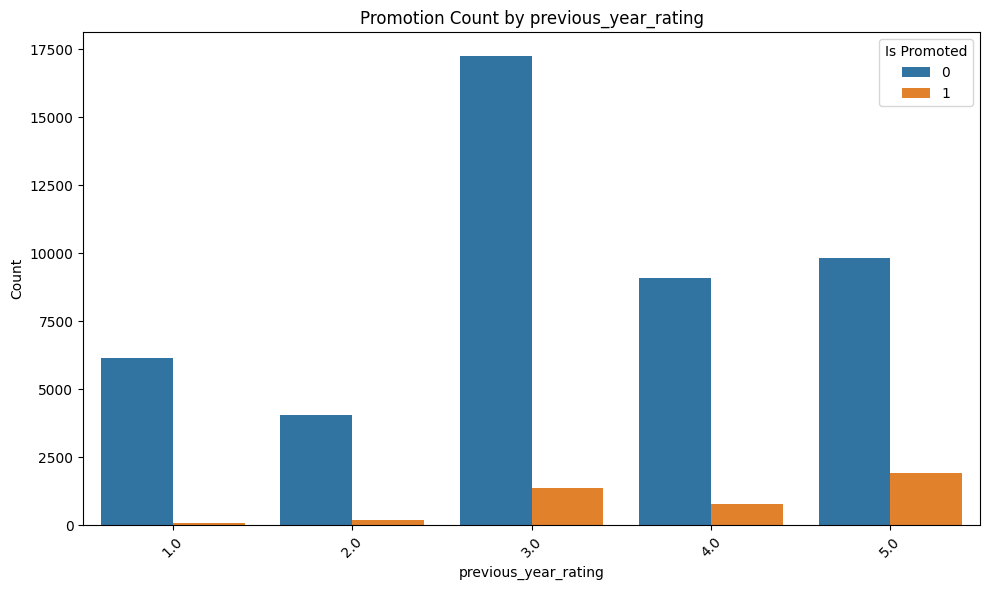

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='previous_year_rating', hue='is_promoted')
plt.title('Promotion Count by previous_year_rating')
plt.xlabel('previous_year_rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

Previous year rating could be a predictor

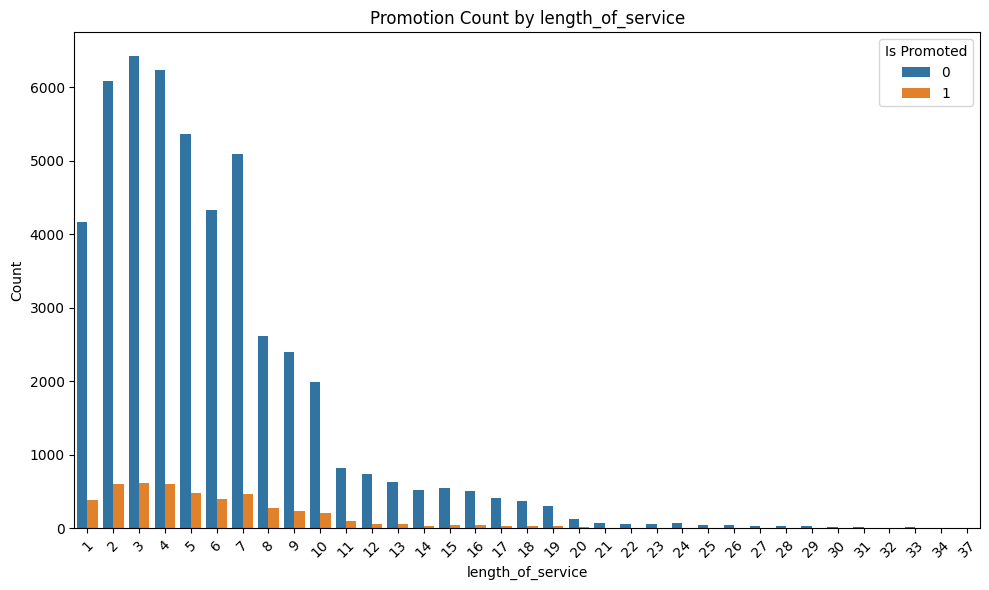

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='length_of_service', hue='is_promoted')
plt.title('Promotion Count by length_of_service')
plt.xlabel('length_of_service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

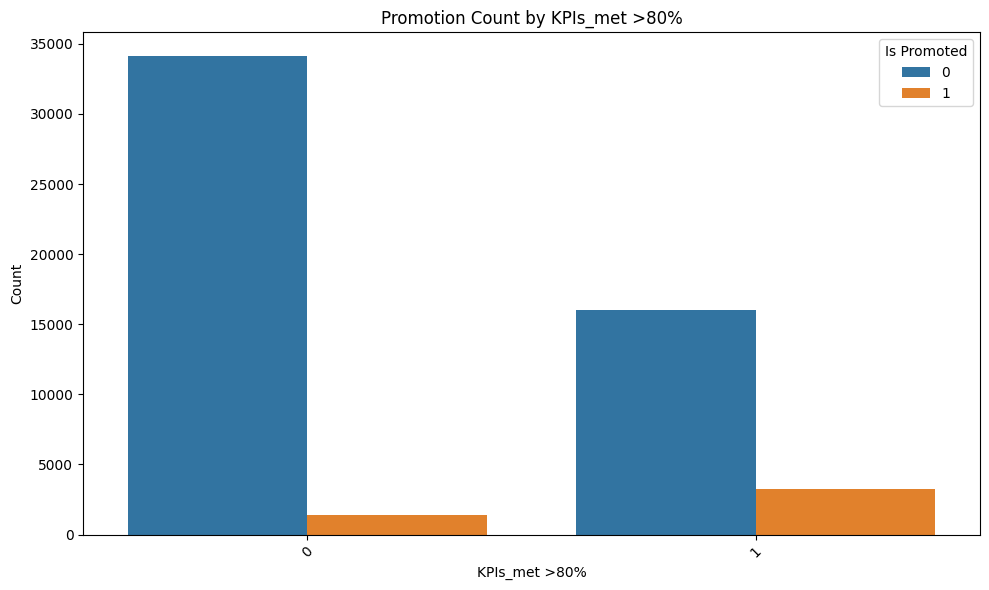

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='KPIs_met >80%', hue='is_promoted')
plt.title('Promotion Count by KPIs_met >80%')
plt.xlabel('KPIs_met >80%')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

KPI met could be a predictor

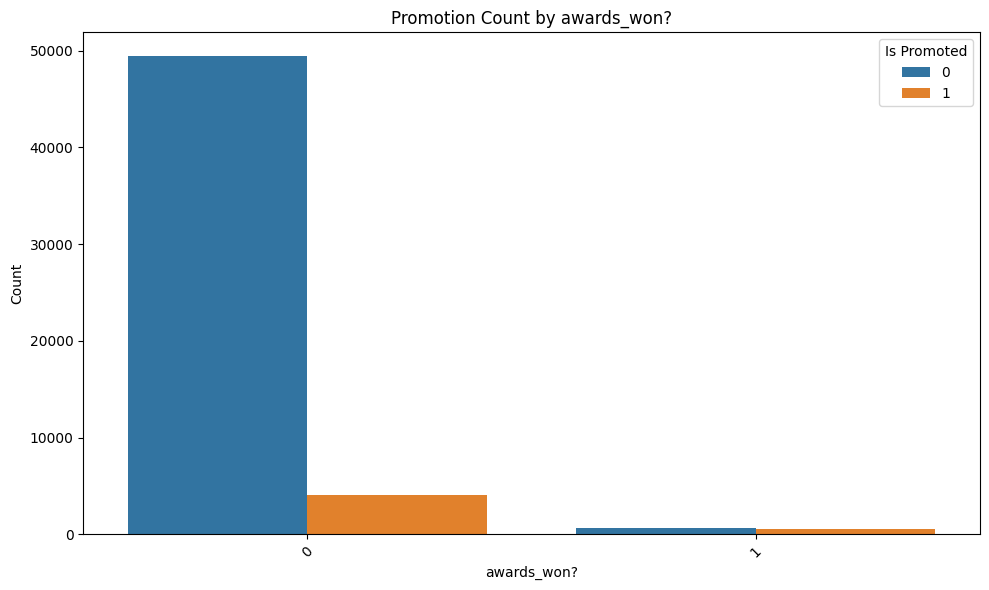

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='awards_won?', hue='is_promoted')
plt.title('Promotion Count by awards_won?')
plt.xlabel('awards_won?')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Promoted')
plt.tight_layout()
plt.show()

Award won could be a predictor, most of the award winners are promoted

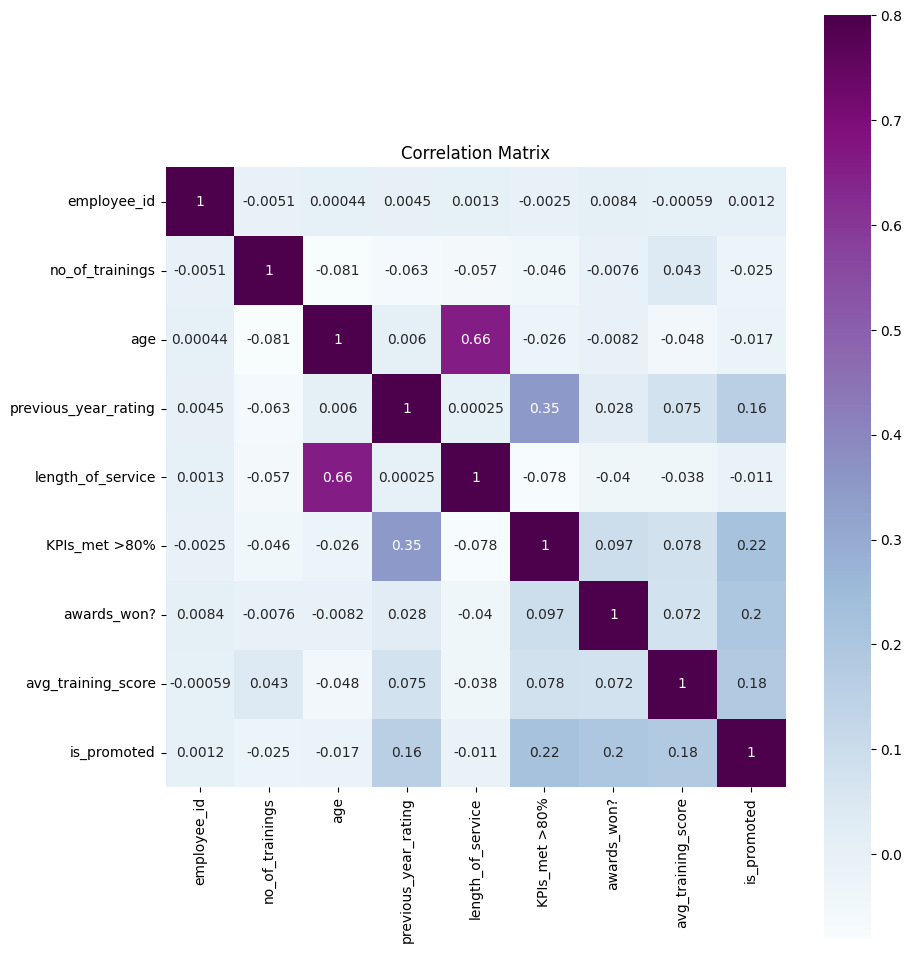

In [49]:
# Correlation analaysis

numeric_data = train.select_dtypes(include=['int64', 'float64'])
matrix = numeric_data.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)
plt.title("Correlation Matrix")
plt.show()



*   KPIs_met >80%	, awards_won?	, avg_training_score,previous_year_rating - showing positive correlation with target variable
*   employee_id, no_of_trainings, age, length_of_service → all show weak or no meaningful correlation with is_promoted

In [50]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

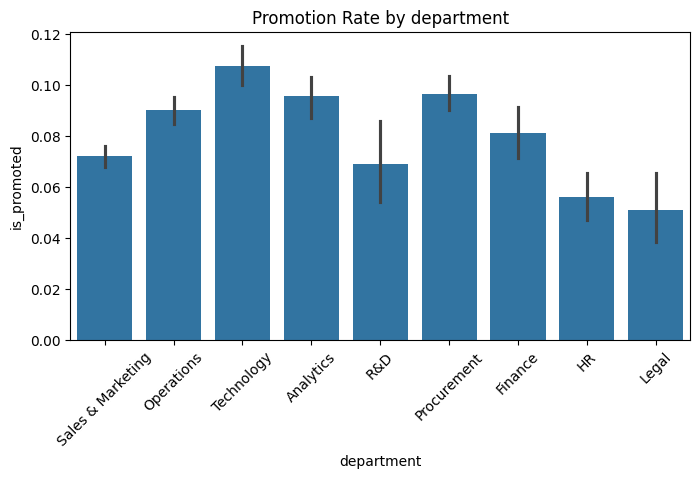

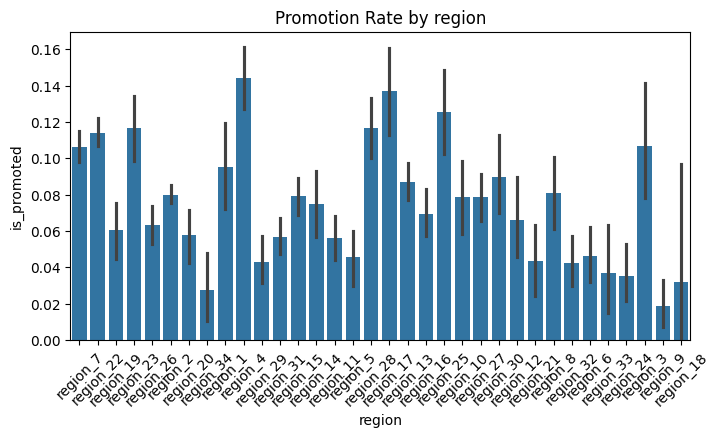

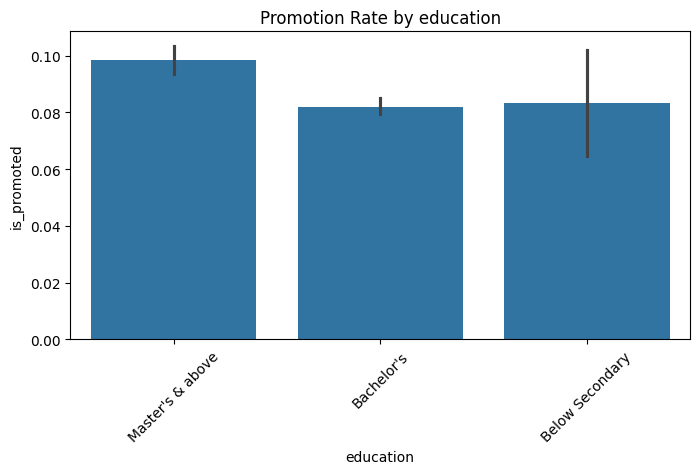

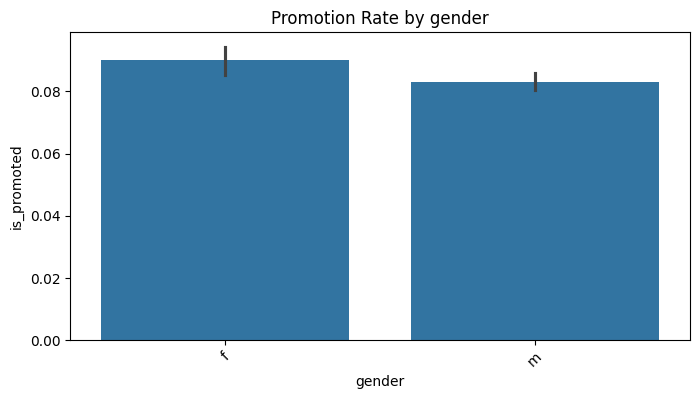

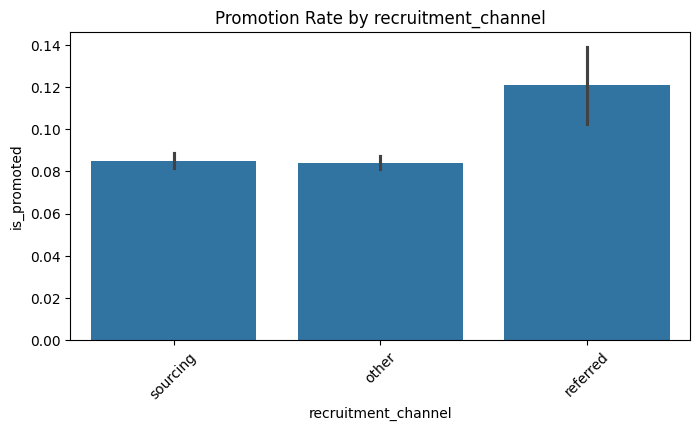

In [51]:
#Correlation with target column
#comparison of promotion likelihood
for col in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='is_promoted', data=train)
    plt.title(f'Promotion Rate by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#Recriuitment channel, education, gender,department, region has some predicting power

Preprocessing

In [69]:
#Missing value handling
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [54]:
test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [70]:
train["education"] = train["education"].fillna(train["education"].mode()[0])
train["previous_year_rating"] = train["previous_year_rating"].fillna(train["previous_year_rating"].mean())

In [71]:
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [72]:
test["education"] = test["education"].fillna(test["education"].mode()[0])
test["previous_year_rating"] = test["previous_year_rating"].fillna(test["previous_year_rating"].mean())

In [73]:
test.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


Handling Outliers

<Axes: >

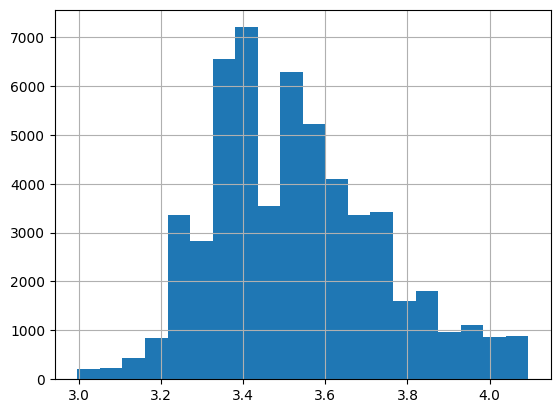

In [75]:
train['age'] = np.log(train['age'])
train['age'].hist(bins=20)

<Axes: >

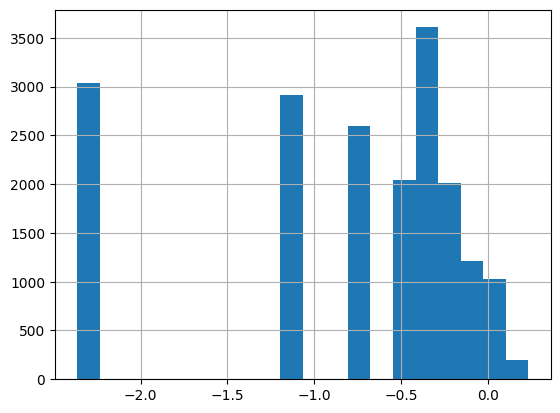

In [80]:
train['length_of_service'] = np.log(train['length_of_service'])
train['length_of_service'].hist(bins=20)

<Axes: >

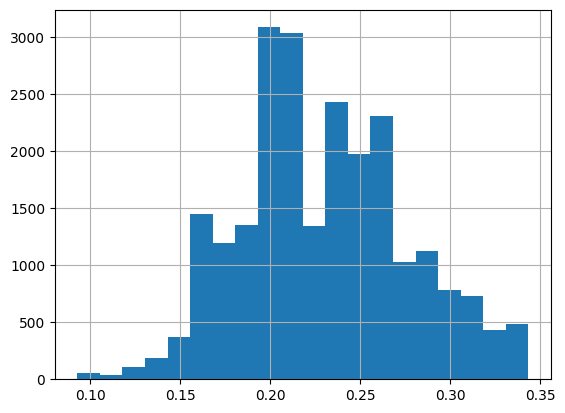

In [81]:
test['age'] = np.log(test['age'])
test['age'].hist(bins=20)

<Axes: >

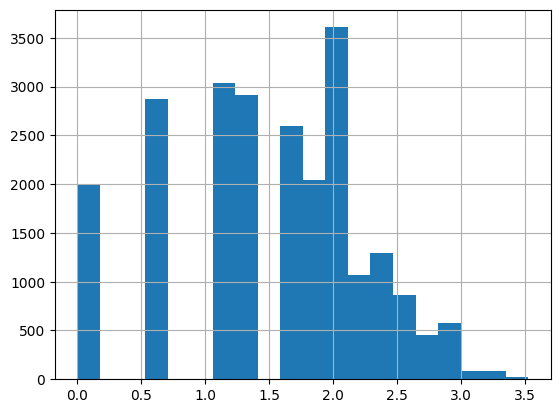

In [78]:
test['length_of_service'] = np.log(test['length_of_service'])
test['length_of_service'].hist(bins=20)

In [82]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [83]:
train=train.drop(["employee_id","no_of_trainings","age","length_of_service"],axis=1)

In [84]:
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [85]:
train=train.drop(["region"],axis=1)

In [86]:
test=test.drop(["region","no_of_trainings","age","length_of_service"],axis=1)

In [87]:
test.columns

Index(['employee_id', 'department', 'education', 'gender',
       'recruitment_channel', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score'],
      dtype='object')

In [89]:
#Encoding

X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

In [97]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(drop='first', sparse_output=False)


X_encoded_cat = encoder.fit_transform(X[categorical_cols])


encoded_col_names = encoder.get_feature_names_out(categorical_cols)


X_encoded_cat_df = pd.DataFrame(X_encoded_cat, columns=encoded_col_names)


X_numeric = X.drop(columns=categorical_cols).reset_index(drop=True)
X_final = pd.concat([X_numeric, X_encoded_cat_df], axis=1)

In [98]:
#Encoding of Test data

categorical_cols = test.select_dtypes(include=['object']).columns.tolist()

test_encoder = OneHotEncoder(drop='first', sparse_output=False)


test_encoded_cat = test_encoder.fit_transform(test[categorical_cols])


test_encoded_col_names = test_encoder.get_feature_names_out(categorical_cols)


test_encoded_cat_df = pd.DataFrame(test_encoded_cat, columns=test_encoded_col_names)


test_numeric = test.drop(columns=categorical_cols).reset_index(drop=True)
test_final = pd.concat([test_numeric, test_encoded_cat_df], axis=1)

In [99]:
X_final.head()

,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,5.0,1,0,49,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5.0,0,0,60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,0,0,50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0,0,50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,0,0,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [101]:
test_final.head()

,employee_id,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,3.339146,1,0,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,74430,3.000000,0,0,51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72255,1.000000,0,0,47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,38562,2.000000,0,0,65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64486,4.000000,0,0,61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [103]:
# Class imbalnace handling
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check before and after
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: is_promoted
0    40112
1     3734
Name: count, dtype: int64
After SMOTE: is_promoted
0    40112
1    40112
Name: count, dtype: int64


Accuracy: 0.8572340813720124

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92     10028
           1       0.31      0.57      0.41       934

    accuracy                           0.86     10962
   macro avg       0.64      0.73      0.66     10962
weighted avg       0.90      0.86      0.88     10962



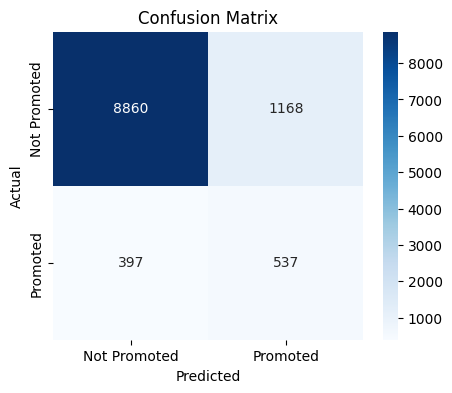

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# 2. Predict on test set (original test set, not SMOTE'd)
y_pred = model.predict(X_test)

# 3. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.7547892720306514

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85     10028
           1       0.23      0.82      0.36       934

    accuracy                           0.75     10962
   macro avg       0.61      0.79      0.61     10962
weighted avg       0.92      0.75      0.81     10962



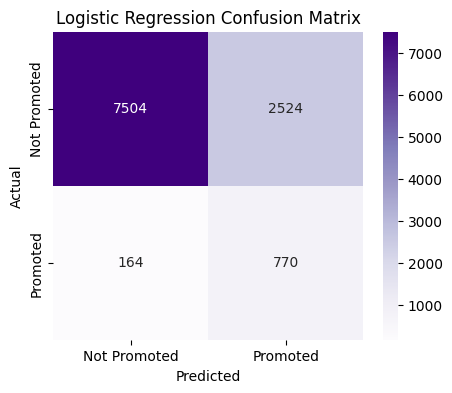

In [105]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8586936690384966

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     10028
           1       0.31      0.54      0.40       934

    accuracy                           0.86     10962
   macro avg       0.63      0.72      0.66     10962
weighted avg       0.90      0.86      0.88     10962



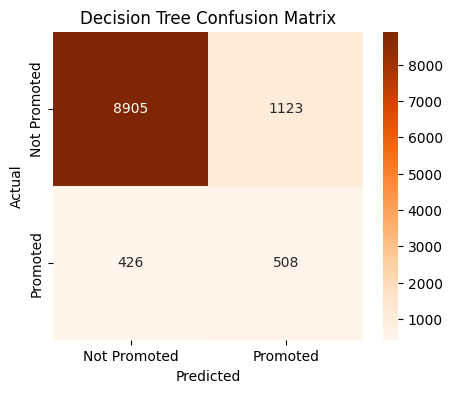

In [107]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8503010399562124

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91     10028
           1       0.31      0.63      0.42       934

    accuracy                           0.85     10962
   macro avg       0.64      0.75      0.66     10962
weighted avg       0.91      0.85      0.87     10962



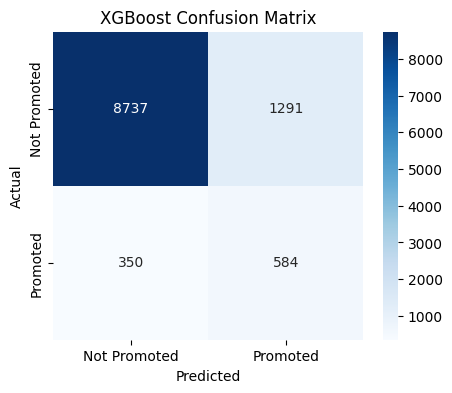

In [108]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Hyper parameter tuning - Random forest

In [109]:

from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,                # 3-fold cross-validation
                           scoring='f1',        # use 'f1' or 'recall' for imbalanced classification
                           n_jobs=-1,           # use all cores
                           verbose=1)

# Fit on SMOTE-resampled training data
grid_search.fit(X_train_smote, y_train_smote)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8566867359970808


In [111]:
# Save employee IDs
employee_ids = test_final['employee_id']

#Drop employee_id column from test_final
X_test_pred = test_final.drop('employee_id', axis=1)

#Predict using trained Random Forest model
y_test_pred = best_rf.predict(X_test_pred)

#Create submission DataFrame
submission = pd.DataFrame({
    'employee_id': employee_ids,
    'is_promoted': y_test_pred
})


save_path = "D:\MY DATA\DATA\ML_AI\submission.csv"

# Save submission file
submission.to_csv(save_path, index=False)

